In [61]:
import numpy as np
import sklearn
import pandas as pd

In [62]:
# Note: I've put the csv files in a folder called data
train = pd.read_csv("train.csv", index_col=0)
val = pd.read_csv("dev.csv", index_col=0)

In [63]:
train.shape

(15539, 2)

In [64]:
val.shape

(1316, 2)

In [65]:
train.head()

,labels,features
ex_id,,
0,"446,521,1149,1249,1265,1482",0:0.084556 1:0.138594 2:0.094304 3:0.195764 4:...
1,"78,80,85,86",0:0.050734 1:0.762265 2:0.754431 3:0.065255 4:...
2,"457,577,579,640,939,1158",0:0.101468 1:0.138594 2:0.377215 3:0.130509 4:...
3,"172,654,693,1704",0:0.186024 1:0.346484 2:0.141456 3:0.195764 4:...
4,"403,508,1017,1052,1731,3183",0:0.135290 1:0.277187 2:0.141456 3:0.065255 4:...


In [66]:
val.head()

,labels,features
ex_id,,
3,"105,897",0:0.118379 1:0.346484 2:0.424367 3:0.195764 4:...
6,"25,419,586,802,2200",0:0.084556 1:0.970155 2:0.471519 3:0.261019 4:...
8,"445,499,814,1135,1255,1943",0:0.050734 1:1.524530 2:2.027533 3:0.652547 5:...
11,"125,502,2167",0:0.118379 2:0.235760 3:0.065255 4:0.262522 7:...
12,"48,57,86,180",0:0.033823 1:0.103945 2:0.094304 3:0.195764 4:...


In [67]:
val = val[~val.labels.str.contains(":")]

In [68]:
train = train[~train.labels.str.contains(":")]

In [69]:
val.shape, train.shape

((1314, 2), (15511, 2))

# Remove broken label examples

In [70]:
labels_list = [label.split(" ") for label in train['labels']]
labels_list = [label[0].split(",") for label in labels_list]
labels_list_val = [label.split(" ") for label in val['labels']]
labels_list_val = [label[0].split(",") for label in labels_list_val]

In [12]:
# # drop the broken indices - found them using this - need to ask on Piazza what's wrong with them
# broken_indices = []
# for i in range(len(labels_list)):
#     for j in range(len(labels_list[i])):
#         try:
#             int(labels_list[i][j])   
#         except:
#             #print(i, labels_list[i])
#             broken_indices.append(i)

In [13]:
# # drop the broken indices - found them using this - need to ask on Piazza what's wrong with them
# broken_indices_val = []
# for i in range(len(labels_list_val)):
#     for j in range(len(labels_list_val[i])):
#         try:
#             int(labels_list_val[i][j])   
#         except:
#             #print(i, labels_list[i])
#             broken_indices_val.append(i)

In [14]:
# labels_array = np.array(labels_list)
# #labels_list = np.delete(labels_array, broken_indices).tolist()
# labels_array_val = np.array(labels_list_val)
# labels_list_val = np.delete(labels_array_val, broken_indices_val).tolist()

In [71]:
len(labels_list), len(labels_list_val)

(15511, 1314)

# Convert labels

In [72]:
labels_list = [[int(s) for s in sublist] for sublist in labels_list] 

In [73]:
labels_list_val = [[int(s) for s in sublist] for sublist in labels_list_val] 

In [88]:
labels_list[0:10]

[[446, 521, 1149, 1249, 1265, 1482],
 [78, 80, 85, 86],
 [457, 577, 579, 640, 939, 1158],
 [172, 654, 693, 1704],
 [403, 508, 1017, 1052, 1731, 3183],
 [174, 379, 380, 381, 449, 493, 677, 1328],
 [592, 595, 617, 694, 923],
 [446, 499, 500, 671, 804, 1210],
 [64, 180, 611],
 [505, 1098, 1310, 1818, 3263]]

In [89]:
from sklearn.preprocessing import MultiLabelBinarizer
# class_list = [i for i in range(0,3993)]
mlb = MultiLabelBinarizer()
encoded_labels = mlb.fit_transform(labels_list)

In [76]:
encoded_labels_val = mlb.fit_transform(labels_list_val)

In [90]:
encoded_labels_df_val = pd.DataFrame(encoded_labels_val, columns = class_list)
encoded_labels_df = pd.DataFrame(encoded_labels, columns = mlb.classes_)

In [84]:
encoded_labels_df_val.shape

(1314, 3993)

In [94]:
encoded_labels_df

,0,1,2,3,4,5,6,7,8,9,...,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
import seaborn as sns

In [93]:
import scipy.stats as ss
def cramers_v(x, y):
    if pd.crosstab(x,y).shape[0]!= 0:
        confusion_matrix = pd.crosstab(x,y)
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2/n
        r,k = confusion_matrix.shape
        phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
        rcorr = r-((r-1)**2)/(n-1)
        kcorr = k-((k-1)**2)/(n-1)
        return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [95]:
data_dict = {'feature_1': [],
'feature_2': [],
'cramers': []}
for x in encoded_labels_df.columns:
    for y in encoded_labels_df.columns:
        data_dict['feature_1'].append(x)
        data_dict['feature_2'].append(y)
        data_dict['cramers'].append(cramers_v(encoded_labels_df[x],encoded_labels_df[y]))

KeyboardInterrupt: 

In [ ]:
cramers_result = pd.DataFrame(data_dict)

In [ ]:
cramers_result = cramers_result.dropna()

In [ ]:
pivoted_data = cramers_result.pivot_table(index = 'feature_1', columns = ['feature_2'],values ='cramers')

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(pivoted_data, cmap="Blues")

# Convert features

In [24]:
def make_dict(entry):
    # entry is a list with form ['id:value', 'id:value']
    col_dict = {}
    for word in entry:
        key, value = word.split(":")
        key = int(key)
        value = float(value)
        col_dict[key] = value
    return col_dict

In [25]:
# drop broken indices
train_df = train['features']
#train_df = train_df.drop(broken_indices, axis=0)
val_df = val['features']

In [26]:
train_df.shape, val_df.shape

((15511,), (1314,))

In [27]:
features = [item.split(" ") for item in train_df]
col_dicts = [make_dict(entry) for entry in features]

In [28]:
len(col_dicts)

15511

In [29]:
features_val = [item.split(" ") for item in val_df]
col_dicts_val = [make_dict(entry) for entry in features_val]

In [30]:
len(col_dicts_val)

1314

In [31]:
# Turn features column into sparse dataframe
# Note: missing values as NaN - should these be zeros?
features_df = pd.DataFrame(col_dicts)
features_df_val = pd.DataFrame(col_dicts_val)

In [32]:
features_df.shape

(15511, 5000)

In [33]:
features_df_val.shape

(1314, 5000)

In [34]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.084556,0.138594,0.094304,0.195764,0.612552,0.106491,0.137765,0.145839,0.304610,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.050734,0.762265,0.754431,0.065255,0.350030,NaN,0.137765,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.101468,0.138594,0.377215,0.130509,0.175015,0.745434,0.137765,1.020873,1.218441,0.309297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.186024,0.346484,0.141456,0.195764,0.262522,0.425962,0.551062,0.437517,0.609220,0.618594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.135290,0.277187,0.141456,0.065255,1.137597,0.106491,0.137765,0.583356,0.152305,0.154649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
features_df_val.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.118379,0.346484,0.424367,0.195764,0.350030,0.212981,0.137765,0.145839,0.152305,0.309297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.084556,0.970155,0.471519,0.261019,0.350030,0.745434,0.275531,0.291678,1.675356,0.463946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.050734,1.524530,2.027533,0.652547,NaN,5.005057,0.137765,0.583356,3.503017,0.618594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.118379,NaN,0.235760,0.065255,0.262522,NaN,NaN,0.145839,0.609220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.033823,0.103945,0.094304,0.195764,0.175015,0.745434,0.137765,0.145839,0.304610,0.618594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### CC and ECC implementation

In [36]:
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.svm import SVC

In [37]:
features_df = features_df.fillna(0)
features_df_val = features_df_val.fillna(0)

In [38]:
X_train = np.array(features_df)
Y_train = np.array(encoded_labels_df)
x_val = np.array(features_df_val)
y_val = np.array(encoded_labels_df_val)

In [39]:
X_train.shape

(15511, 5000)

In [40]:
x_val

array([[0.118379, 0.346484, 0.424367, ..., 0.      , 0.      , 0.      ],
       [0.084556, 0.970155, 0.471519, ..., 0.      , 0.      , 0.      ],
       [0.050734, 1.52453 , 2.027533, ..., 0.      , 0.      , 0.      ],
       ...,
       [0.033823, 0.20789 , 0.047152, ..., 0.      , 0.      , 0.      ],
       [0.050734, 0.20789 , 0.188608, ..., 0.      , 0.      , 0.      ],
       [0.050734, 0.381132, 0.282912, ..., 0.      , 0.      , 0.      ]])

In [41]:
y_val

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## K Neighbors

In [42]:
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.neighbors import KNeighborsClassifier

In [43]:
neighbors=[2,5,10,20,50,100]
weights=['uniform', 'distance']

In [44]:
results = []
for i in neighbors:
    for j in weights:
        neigh = KNeighborsClassifier(n_neighbors=i, weights=j)
        neigh.fit(X_train, Y_train)
        y_score = neigh.predict_proba(x_val)
        y_score_trans=np.zeros((3993,1314))
        for k in range(3993):
            y_score_trans[k]=1-y_score[k][:,0]
        y_score_final=y_score_trans.T
        precision=label_ranking_average_precision_score(y_val, y_score_final)
        print(precision,i,j)
        results.append(precision)

0.3346465475909549 2 uniform
0.37118921853096526 2 distance
0.392604973055259 5 uniform
0.4493779595422241 5 distance
0.409008008084182 10 uniform
0.4707394311412471 10 distance
0.4042889292722091 20 uniform
0.46108068958427634 20 distance
0.3727860686761336 50 uniform
0.42189889224930077 50 distance
0.33510085143228113 100 uniform
0.37616562907959217 100 distance


In [61]:
results

[0.3346465475909549,
 0.37118921853096526,
 0.392604973055259,
 0.4493779595422241,
 0.409008008084182,
 0.4707394311412471,
 0.4042889292722091,
 0.46108068958427634,
 0.3727860686761336,
 0.42189889224930077,
 0.33510085143228113,
 0.37616562907959217]

In [79]:
df=pd.DataFrame(np.zeros((12,3)),columns=["neighbors","weights","precision"])
k=0
for i in neighbors:
    for j in weights:
        df.iloc[k]=[i,j,results[k]]
        k+=1
df

,neighbors,weights,precision
0,2.0,uniform,0.334647
1,2.0,distance,0.371189
2,5.0,uniform,0.392605
3,5.0,distance,0.449378
4,10.0,uniform,0.409008
5,10.0,distance,0.470739
6,20.0,uniform,0.404289
7,20.0,distance,0.461081
8,50.0,uniform,0.372786
9,50.0,distance,0.421899


In [81]:
import matplotlib.pyplot as plt

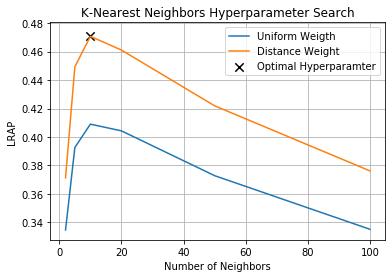

In [116]:
plt.plot(neighbors,df["precision"][df["weights"]=="uniform"],label="Uniform Weigth")
plt.plot(neighbors,df["precision"][df["weights"]=="distance"],label="Distance Weight")
plt.scatter(df["neighbors"][df["precision"]==np.max(results)].values[0],np.max(results),
            marker="x",label="Optimal Hyperparamter",color="black",s=70)
plt.xlabel("Number of Neighbors")
plt.ylabel("LRAP")
plt.grid()
plt.legend(loc="upper right")
plt.title("K-Nearest Neighbors Hyperparameter Search")
plt.savefig("KNN.png",dpi=1000)

## LR

In [48]:
from sklearn.linear_model import RidgeClassifierCV
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
cv = [10]
alphas=[(0.0001, 0.01, 0.1),(1.0,2.0,5.0),(0.1,1.0,10.0)]
results =[]
for i in cv:
    for j in alphas:   
        clf = RidgeClassifierCV(alphas=j,cv=i)
        clf.fit(X_train,Y_train)
        y_score = clf.decision_function(x_val)
        precision =label_ranking_average_precision_score(y_val, y_score)
        print(precision,i,j)
        results.append(precision)


KeyboardInterrupt



In [49]:
cv = [15,None]
alphas=[(0.0001, 0.01, 0.1),(1.0,2.0,5.0),(0.1,1.0,10.0)]

In [50]:
results=[0.505377872112244,0.5068242493202174,0.5068242493202174,0.5048943364851514,
         0.5063438610472137,0.5068242493202174]

In [56]:
df=pd.DataFrame(np.zeros((6,3)),columns=["cv","alphas","precision"])
cv[1]=X_train.shape[0]
alphas=[str(i) for i in alphas]
k=0
for i in cv:
    for j in alphas:
        df.iloc[k]=[i,str(j),results[k]]
        k+=1
df

,cv,alphas,precision
0,15.0,"(0.0001, 0.01, 0.1)",0.505378
1,15.0,"(1.0, 2.0, 5.0)",0.506824
2,15.0,"(0.1, 1.0, 10.0)",0.506824
3,15511.0,"(0.0001, 0.01, 0.1)",0.504894
4,15511.0,"(1.0, 2.0, 5.0)",0.506344
5,15511.0,"(0.1, 1.0, 10.0)",0.506824


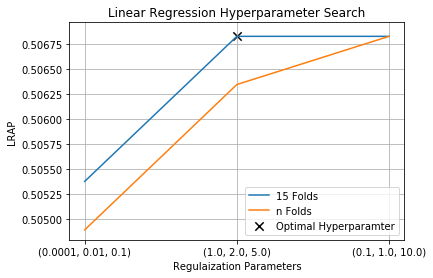

In [60]:
import matplotlib.pyplot as plt
plt.plot(alphas,df["precision"][df["cv"]==15],label="15 Folds")
plt.plot(alphas,df["precision"][df["cv"]==cv[1]],label="n Folds")
plt.scatter(df["alphas"][df["precision"]==np.max(results)].values[0],np.max(results),
            marker="x",label="Optimal Hyperparamter",color="black",s=70)
plt.xlabel("Regulaization Parameters")
plt.ylabel("LRAP")
plt.grid()
plt.legend(loc="lower right")
plt.title("Linear Regression Hyperparameter Search")
plt.savefig("LR.png",dpi=1000)